In [27]:
import cv2 as cv
import matplotlib.pyplot as plt

im = cv.imread('fprint3.pgm')
imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
print(imgray.shape)

def view(img):
    k = 5
    fig,ax1 = plt.subplots(figsize=(k,k))
    if len(img.shape)==2:
        ax1.imshow(img, vmin=0, vmax=255, cmap='gray')
    else:
        ax1.imshow(img)   
    plt.axis('off')
    plt.show()

(768, 768)


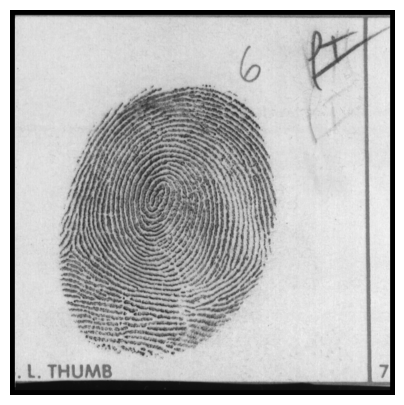

In [29]:
import numpy as np

def imgpad(img, r):
    """ Receives and binarized image and the thikness
        wanted for the padding and returns the image
        padded
        
    Args:
        img (np array): The binarized image or array to be padded
        r (int): The thikness of the array

    Returns:
        The image padded
    """


    #Getting the images original shape
    nrows, ncols = img.shape

    #Creating an matrix full of zeros with the dims. of img with the desired padding
    padded = np.zeros((nrows + 2*r, ncols + 2*r), dtype = img.dtype)

    #Adding img in the center of the padded array
    padded[r:r+nrows, r:r+ncols] = img

    return padded

binary_image = np.array([[0, 1, 0, 7],
                         [1, 0, 1, 8],
                         [0, 1, 0, 9]], dtype=np.uint8)

imagen = imgpad(imgray,10)
view(imagen)

In [ ]:
def find(data, i):
    """ Receives an array of numbers and the value to find
        the father value and returns it
        
    Args:
        data (np array): The array of numbers to check
        i (int): The value to check

    Returns:
        The father of the number checked
    """

    #If the number is equal, it is the father
    if i != data[i]:
        data[i] = find(data, data[i])
    return data[i]

def union(data, i, j):
    """ Receives an array of numbers and to values to check.
        If the unions are the same, it doesnt changes
        
    Args:
        data (np array): The array of numbers to check
        i (int): The first value to check
        j (int): The second value to check
    """
    
    #Gets the father of both numbers and verifies if they are related
    pi, pj = find(data, i), find(data, j)
    if pi != pj:
        data[pi] = pj